<font size=6> <b> Capstone Project - The Battle of Neighborhoods (Week 1) </b> </font>

<font size =4> A description of the problem and a discussion of the background </font>

The problem I would like to duscuss in this Capstone Project is the problem of COVID-19 distribution in Moscow, Russian Federation. I also would like to compare and visualize numbers of daily infections in NY State, USA and Moscow at certain dates, as they both have similar population and similar population density.
I will use Folium library to visualize map of places in Moscow, where COVID-19 cases have been reported and cluster them into some groups and use Fousquare API to explore venues, wich are <b> not </b> safe to visit when quarantine will be partly removed.
<br><br>
Lots of people spend there free time in nearby venues and also lots of people try to own or rent a flat near theirs work.
Some of them are living in a danger zone, and can contact with virus at any nearby venue and get sick.
This research will help to make a decsision, to stay home and avoid being infected and warn people that they may contact with infected people at work or at nearby museum, cafe or supermarket, etc. with higher probability
<br><br>
I'll mark top-visited venues as <b> not-safe </b>, if the quantity of infected people in the neighborhood, where venue is situated is excessively large.
<br><br>
I hope, that those, who will see this maps can find necessary geo-information and avoid being infected.
<br><br>
<b> Please, pay attention, that it is not a official goverment recomendation. Information in this research is stored as is
and the author is not responsible for your decisions. Also, author is not responsible for probabale infection case, if you decide to visit any venue.</b>

I think, that every person, living in Moscow, Russian Federation will be interested in this research, because anyone would like to avoid being infected. Also, I think, that everyone who monitors the world spread of coronavirus will be also interested in this project.

<font size=6> <b> Data Sources Description </b> </font> 

For this research i will use geodatadata from <a href='https://coronavirus.mash.ru/'> Coronavirus Moscow Map </a> for creating and exploring Moscow and Moscow Oblast' map. Pay attention, that it is not an official govermental data. For NY State i will use <a href='https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/United_States_medical_cases'> COVID-19 pandemic data/United States medical cases </a>

<b>Importing libraries</b>

In [14]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import lxml
import folium
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
# for fousquare
CLIENT_ID = 'GGOLUZUYY5SAJDVDC2L2HRYDNZM2BWZJMW4BTNFG3UE2Y1EK'
CLIENT_SECRET = 'ZYI4YK1WOLODKQOUIIBWA1EXHN5O2KUKWWEWJOH1CYA0PQDU'
VERSION = '20200523'
LIMIT = 100
radius= 500

Let's take a look on a data from Coronavirus Moscow Map. Data is stored in a JSON file.

In [3]:
table = pd.read_json('coords_coronavirus_on_date.txt')
table.head()

,date,coordinates
0,24 марта,"[[55.865884, 37.589033], [55.774234, 37.677751..."
1,25 марта,"[[55.852278, 37.658338], [55.673747, 37.6547],..."
2,26 марта,"[[55.618181, 37.660772], [55.898069, 37.615623..."
3,27 марта,"[[55.635691, 37.724912], [55.738622, 37.602813..."
4,28 марта,"[[55.648093, 37.394027], [55.545375, 37.523824..."


Okay, we can see, that data loads correctly. Data column has dates (months nams are in Russin language) and coordinates column has a list of coords (lalilude and longitude) for every date. Lets make a new dataframe, where will be date and quantity of infection cases. 

In [4]:
df = pd.DataFrame([i for i in table.coordinates], index=table.date)
data = pd.DataFrame([df.index, [len([x for x in df.iloc[i] if x is not None]) for i in range(len(df))]]).T
data.columns = ['date', 'quantity']
data.head()

,date,quantity
0,24 марта,97
1,25 марта,41
2,26 марта,42
3,27 марта,64
4,28 марта,72


Seems that all is OK. Lets translate date column completly to english and create a hist of cases per day.

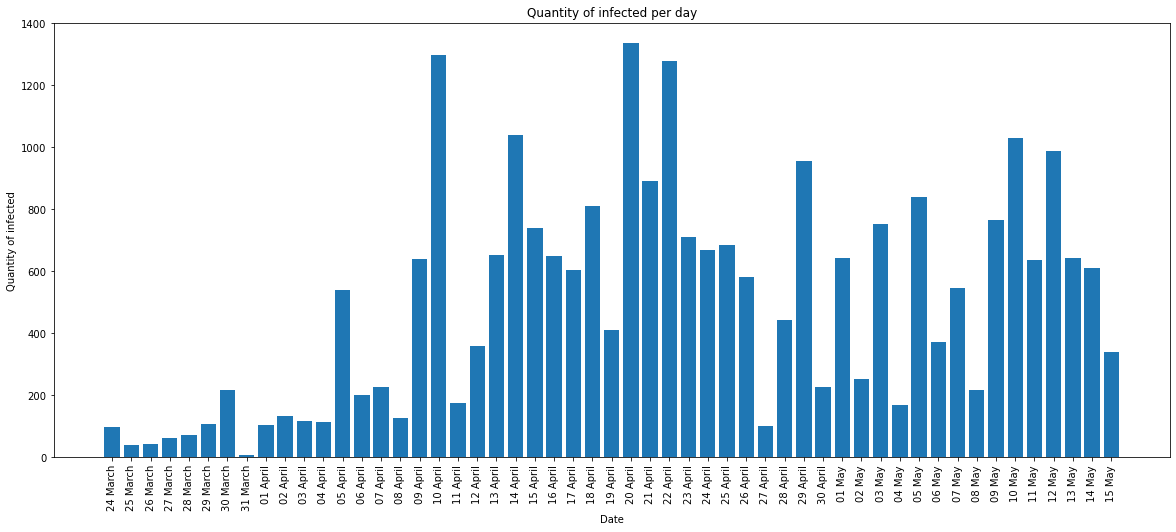

In [6]:
data.date = [i.replace('марта', 'March').replace('мая', 'May').replace('апреля', 'April') for i in data.date]
x = [i for i in range(len(data))]
y = data.quantity.astype(float)
fig = plt.figure(figsize=(20, 8))
ax = plt.bar(x=data.date, height=y)
plt.xticks(rotation='vertical')
plt.ylabel('Quantity of infected')
plt.xlabel('Date')
plt.title('Quantity of infected per day')
plt.show()

Lets create a normalized distplot. I will use Min-Max Method for data normalization.

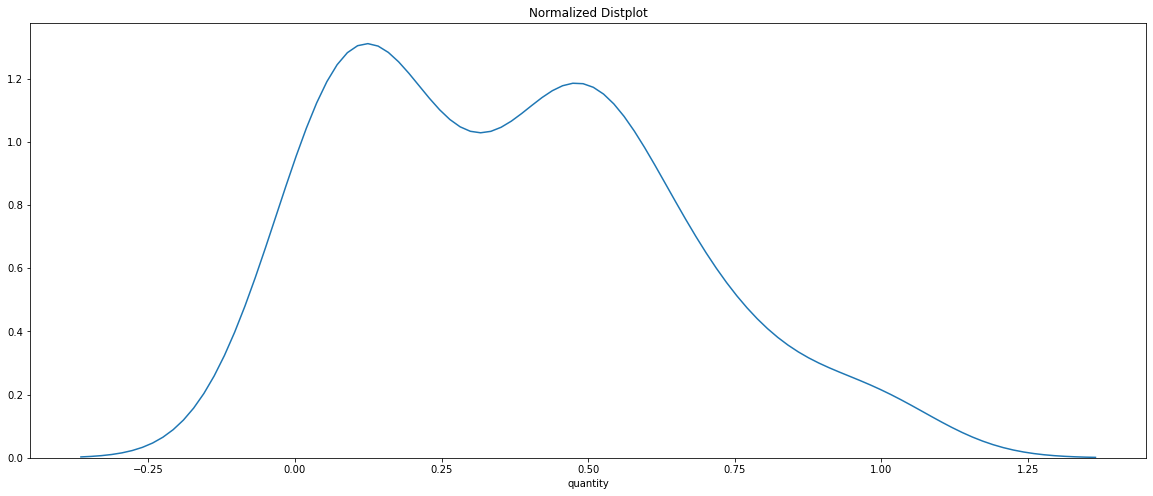

In [9]:
fig1 = plt.figure(figsize=(20, 8))
ax1 = sns.distplot((y-y.min())/(y.max()-y.min()), hist=False)
plt.title('Normalized Distplot')
plt.show()

And lest see how many infection cases are in Moscow and Moscow oblast' from 24th of March till 15th of May

In [10]:
print('Total number of infection cases in Moscow and Moscow oblast in range March 24 - May 15:', data.quantity.sum())

Total number of infection cases in Moscow and Moscow oblast in range March 24 - May 15: 26287


Now lets load Dataset for US, NY State

In [15]:
request = requests.get(r'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/United_States_medical_cases')
soup = BeautifulSoup(request.text, 'lxml')
tbl = soup.find('table')
df_a = pd.read_html(str(tbl))[0]
df_a.head()

Date West                                                              \
     Date   AK   AZ   CA   CO   HI   ID   MT   NM   NV   OR   UT   WA   WY   
0  Jan 21  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1  NaN   
1  Jan 24  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  Jan 25  NaN  NaN    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  Jan 26  NaN    1    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  Jan 30  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

  Midwest                                                             South  \
       IA   IL   IN   KS   MI   MN   MO   ND   NE   OH   OK   SD   WI    AL   
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
1     NaN    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   
4     NaN    1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   

                                                              Northeast       \
    AR   FL   GA   KY   LA   MS   NC   SC   TN   TX   VA   WV        CT   DC   
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN  NaN   

                                                    Territories            \
    DE   MA   MD   ME   NH   NJ   NY   PA   RI   VT          GU   MP   PR   
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN         NaN  NaN  NaN   

          Date Confirmed     Deaths      Recovered       
    VI  Date.1       New Cml    New  Cml       New  Cml  
0  NaN  Jan 21         1   1    NaN  NaN       NaN  NaN  
1  NaN  Jan 24         1   2    NaN  NaN       NaN  NaN  
2  NaN  Jan 25         1   3    NaN  NaN       NaN  NaN  
3  NaN  Jan 26         2   5    NaN  NaN       NaN  NaN  
4  NaN  Jan 30         1   6    NaN  NaN       NaN  NaN

Allright, we've get the data. Now we need to sort it by similar to Moscow DataFrame date and get the NY state only.

In [16]:
df_a = df_a[df_a.iloc[:,0] != 'Date']
col = []
for i in df_a.columns:
    col.append(i[1])
df_a.columns = col
df_ny = df_a[['Date', 'NY']]
df_ny = df_ny.drop(df_ny.loc[range(100, 106), :].index, axis=0)
df_ny.fillna(0, inplace=True)
df_ny = df_ny.T
df_opt = df_ny.loc[:,41:97].T
df_opt.index = [i for i in range(len(df_opt))]
df_merged = pd.concat([data, df_opt], axis=1, ignore_index=True)
df_merged.index = df_merged.iloc[:,0]
df_merged.drop([0, 2], axis=1, inplace=True)
df_merged.columns=['Moscow', 'NY']
df_merged.Moscow = df_merged.Moscow.astype(float)
df_merged.NY = df_merged.NY.astype(float)
df_merged.head()

,Moscow,NY
0,,
24 March,97.0,4790.0
25 March,41.0,5146.0
26 March,42.0,6447.0
27 March,64.0,7377.0
28 March,72.0,7683.0


We've got necessary table for comparing. Lets vizualize data

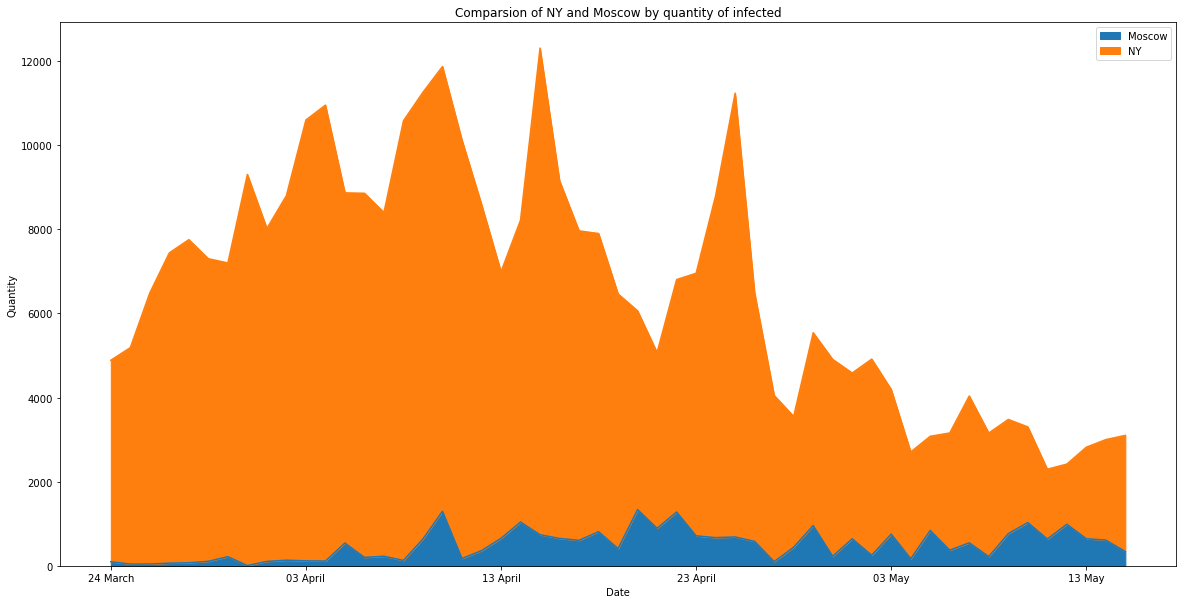

In [20]:
df_merged.plot.area(figsize=(20, 10))
plt.title('Comparsion of NY and Moscow by quantity of infected')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

Let's normalize data and look again

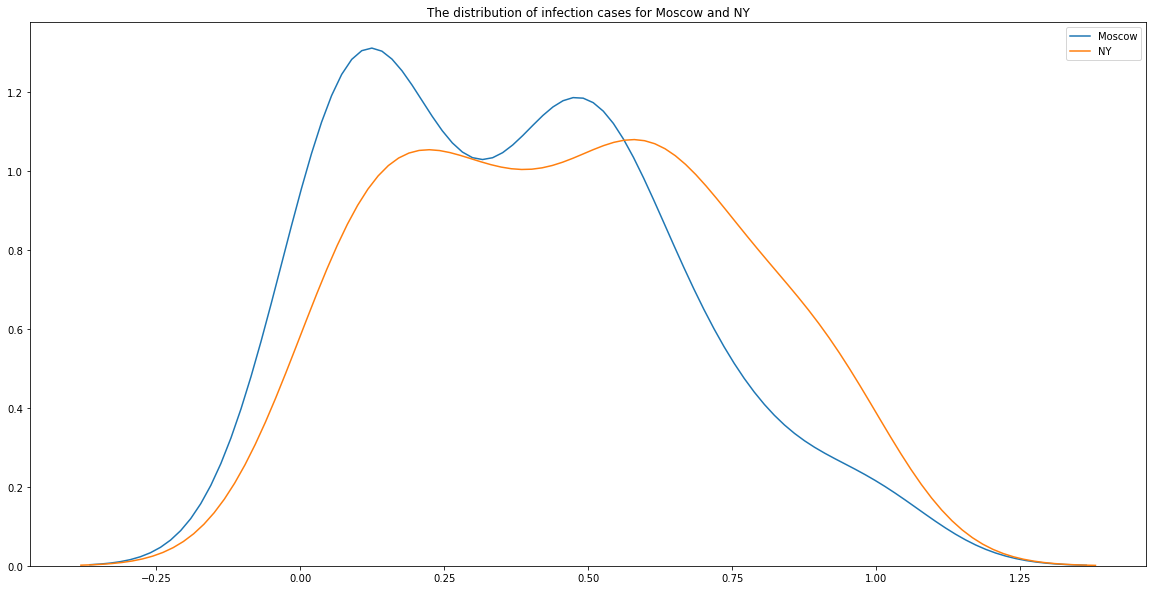

In [22]:
df_normalized = df_merged
df_normalized.Moscow = [(i - df_normalized.Moscow.min())/(df_normalized.Moscow.max()-df_normalized.Moscow.min()) for i in df_normalized.Moscow]
df_normalized.NY = [(i - df_normalized.NY.min())/(df_normalized.NY.max()-df_normalized.NY.min()) for i in df_normalized.NY]
fig3 = plt.figure(figsize=(20,10))
axM = sns.distplot(df_normalized.Moscow, hist=False, label='Moscow')
axNY = sns.distplot(df_normalized.NY, hist=False, ax=axM, label='NY')
plt.xlabel('')
plt.title('The distribution of infection cases for Moscow and NY')
plt.show()

Now lets look on a Area plot again, but now with normalized data

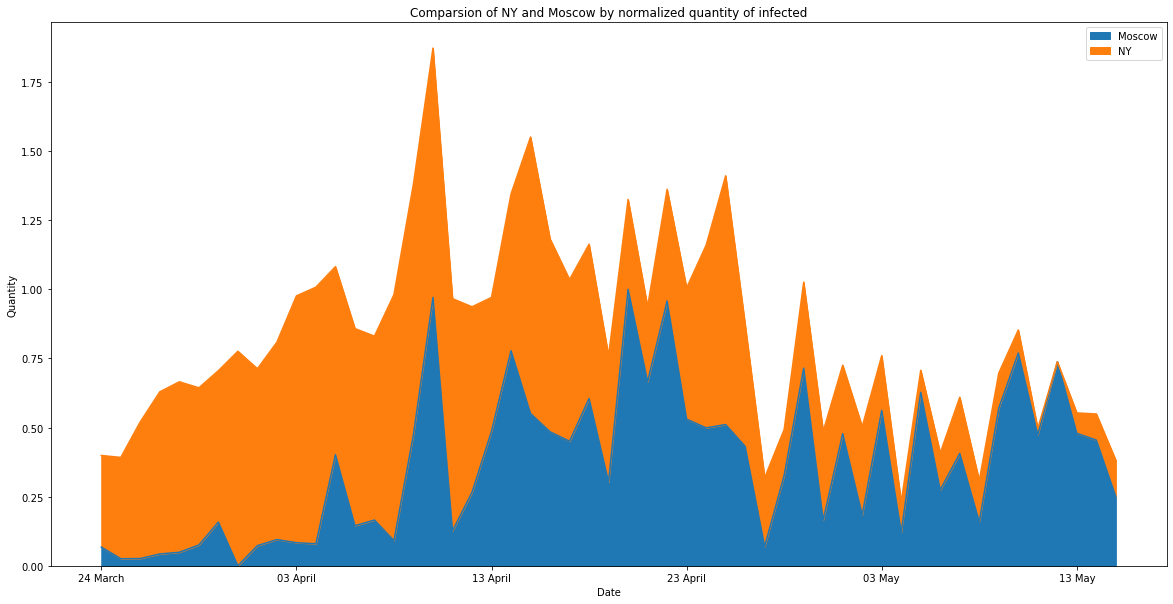

In [24]:
df_normalized.plot.area(figsize=(20, 10))
plt.title('Comparsion of NY and Moscow by normalized quantity of infected')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()